<a href="https://colab.research.google.com/github/RadulDev/scRNA-Seq_Test/blob/main/RlangTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
x <- seq(0, 2*pi, length.out=50)
x

[1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853

In [3]:
install.packages('Seurat')
library(Seurat)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘plyr’, ‘BH’, ‘sitmo’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘progressr’, ‘sp’, ‘rgeos’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘abind’, ‘tensor’, ‘goftest’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘cowplot’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘RANN’, ‘Rcpp’, ‘RcppAnnoy’, ‘reticulate’, ‘ROCR’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘SeuratObject’, ‘shiny’, ‘spatstat.core’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’


Attaching SeuratObject

Attaching sp



In [6]:
url <- "https://cf.10xgenomics.com/samples/cell-exp/6.1.0/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5"

In [8]:
dest <- "/content/sample_data/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5"
download.file(url,dest)

In [9]:
install.packages('tidyverse')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [16]:
nsclc.sparse.m <- read10X_h5(filename = '/content/sample_data/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5')


ERROR: ignored

In [17]:
c <- Read10X_h5(filename = '/content/sample_data/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5')

ERROR: ignored

In [18]:
install.packages('hdf5r')
library(hdf5r)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘hdf5r’


The following object is masked from ‘package:purrr’:

    flatten_df




In [19]:
nsclc.sparse.m <- Read10X_h5(filename = '/content/sample_data/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5')


Genome matrix has multiple modalities, returning a list of matrices for this genome



In [20]:
str(nsclc.sparse.m)

List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:150360352] 11692 26583 2510 8755 11717 13480 23180 29255 500 23118 ...
  .. ..@ p       : int [1:4387769] 0 2 8 12 15 15 17 19 22 22 ...
  .. ..@ Dim     : int [1:2] 36601 4387768
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:4387768] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:150360352] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:2221673] 7 1 4 0 0 1 2 3 4 6 ...
  .. ..@ p       : int [1:4387769] 0 1 1 1 1 1 1 1 2 2 ...
  .. ..@ Dim     : int [1:2] 9 4387768
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:4387768] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1"

In [21]:
cts <- nsclc.sparse.m$`Gene Expression`

In [22]:
nsclc.Seurat.obj <- CreateSeuratObject(counts = cts, project = 'NSCLC', min.cells = 3, min.features = 200)
str(nsclc.Seurat.obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:125873930] 23 24 64 142 187 395 442 495 517 618 ...
  .. .. .. .. .. ..@ p       : int [1:58987] 0 474 2283 4627 9387 17892 20194 21463 22782 25258 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 31117 58986
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:31117] "AL627309.1" "AL627309.3" "AL627309.5" "AL627309.4" ...
  .. .. .. .. .. .. ..$ : chr [1:58986] "AAACCCAAGAGGATCC-1" "AAACCCAAGAGTACCG-1" "AAACCCAAGATGGCGT-1" "AAACCCAAGCATTTGC-1" ...
  .. .. .. .. .. ..@ x       : num [1:125873930] 1 1 1 2 1 1 2 2 3 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:125873930]

In [23]:
nsclc.Seurat.obj

An object of class Seurat 
31117 features across 58986 samples within 1 assay 
Active assay: RNA (31117 features, 0 variable features)

In [26]:
nsclc.Seurat.obj[["percent.mt"]] <- PercentageFeatureSet(nsclc.Seurat.obj,pattern = "^MT-")


In [27]:
view(nsclc.Seurat.obj@meta.data)

In [28]:
nsclc.Seurat.obj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAGGATCC-1,NSCLC,709,474,0.5641749
AAACCCAAGAGTACCG-1,NSCLC,4562,1809,4.4498027
AAACCCAAGATGGCGT-1,NSCLC,6897,2344,1.7833841
AAACCCAAGCATTTGC-1,NSCLC,24986,4760,1.7049548
AAACCCAAGCCTCAGC-1,NSCLC,64353,8505,6.6321694
AAACCCAAGCTGGTGA-1,NSCLC,7087,2302,3.7815719
AAACCCAAGGTAAACT-1,NSCLC,3041,1269,3.0910885
AAACCCAAGTACAGAT-1,NSCLC,3692,1319,9.2632719
AAACCCAAGTCCTGCG-1,NSCLC,10445,2476,1.2158928


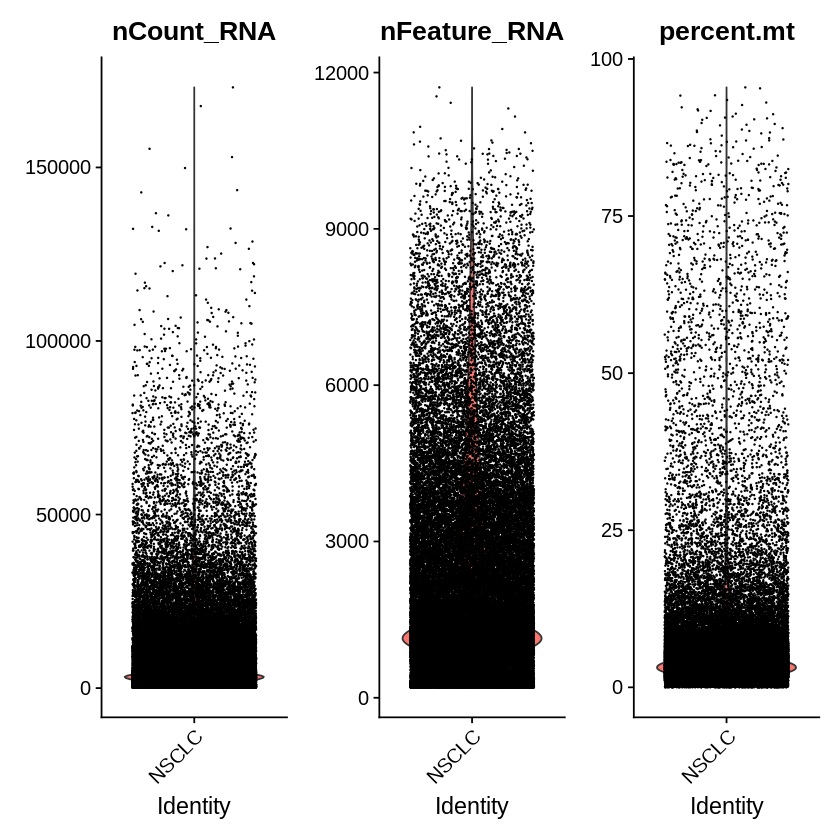

In [30]:
VlnPlot(nsclc.Seurat.obj,features = c("nCount_RNA", "nFeature_RNA", "percent.mt"),ncol = 3 )

`geom_smooth()` using formula 'y ~ x'



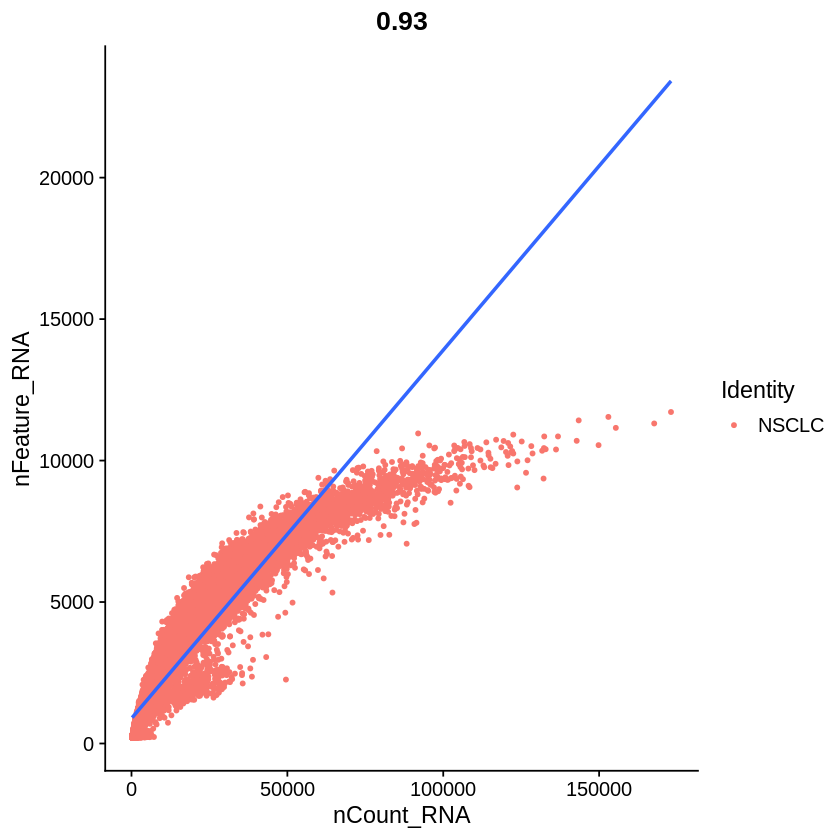

In [31]:
FeatureScatter(nsclc.Seurat.obj,feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth(method = 'lm')

In [33]:
nsclc.Seurat.obj <- subset(nsclc.Seurat.obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)


normalizing

In [36]:
nsclc.Seurat.obj <- NormalizeData(nsclc.Seurat.obj)
str(nsclc.Seurat.obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:27893952] 23 24 64 142 187 395 442 495 517 618 ...
  .. .. .. .. .. ..@ p       : int [1:24860] 0 474 2283 4627 6929 8198 10674 10935 12890 14468 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 31117 24859
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:31117] "AL627309.1" "AL627309.3" "AL627309.5" "AL627309.4" ...
  .. .. .. .. .. .. ..$ : chr [1:24859] "AAACCCAAGAGGATCC-1" "AAACCCAAGAGTACCG-1" "AAACCCAAGATGGCGT-1" "AAACCCAAGCTGGTGA-1" ...
  .. .. .. .. .. ..@ x       : num [1:27893952] 1 1 1 2 1 1 2 2 3 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:27893952] 23 

In [38]:
nsclc.Seurat.obj <- FindVariableFeatures(nsclc.Seurat.obj, selection.method = "vst", nfeatures = 2000)

In [39]:
str(nsclc.Seurat.obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:27893952] 23 24 64 142 187 395 442 495 517 618 ...
  .. .. .. .. .. ..@ p       : int [1:24860] 0 474 2283 4627 6929 8198 10674 10935 12890 14468 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 31117 24859
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:31117] "AL627309.1" "AL627309.3" "AL627309.5" "AL627309.4" ...
  .. .. .. .. .. .. ..$ : chr [1:24859] "AAACCCAAGAGGATCC-1" "AAACCCAAGAGTACCG-1" "AAACCCAAGATGGCGT-1" "AAACCCAAGCTGGTGA-1" ...
  .. .. .. .. .. ..@ x       : num [1:27893952] 1 1 1 2 1 1 2 2 3 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:27893952] 23 

In [41]:
top10 <- head(VariableFeatures(nsclc.Seurat.obj), 10)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 2954 rows containing missing values (geom_point).”


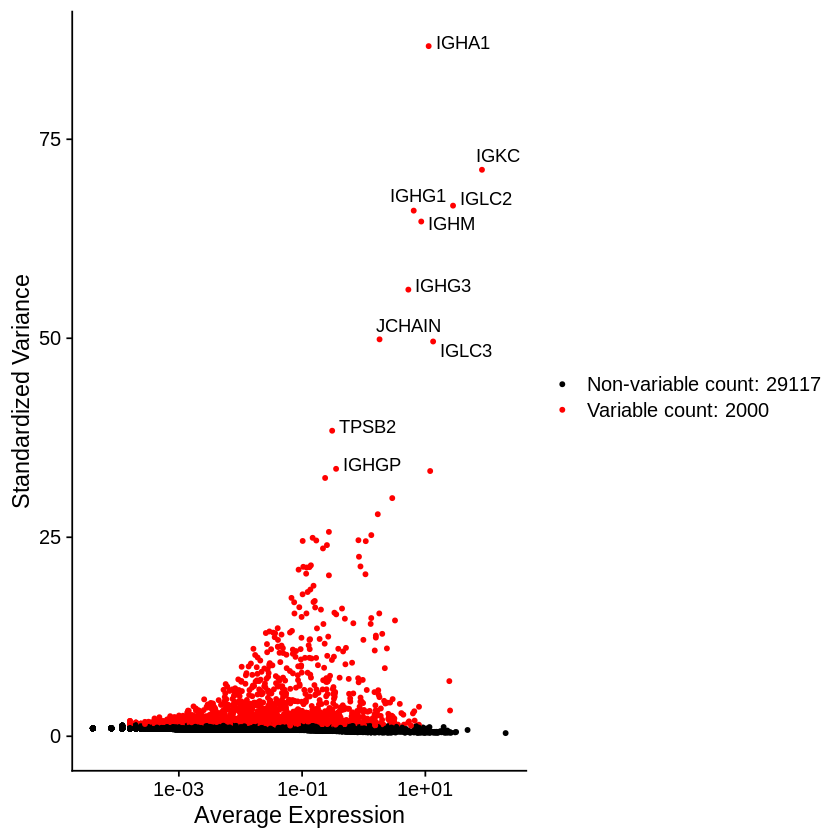

In [42]:
plot1 <- VariableFeaturePlot(nsclc.Seurat.obj)
LabelPoints(plot = plot1, points = top10, repel = TRUE)

scaling Datatset

In [2]:
all.genes <- rownames(nsclc.Seurat.obj)
nsclc.Seurat.obj <- ScaleData(nsclc.Seurat.obj, features = all.genes)
str(nsclc.Seurat.obj)

ERROR: ignored